In [81]:
#dog-rates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from scipy import stats

In [82]:
dog_rates = pd.read_csv("dog_rates_tweets.csv", header=0, names=['id', 'created_at', 'text'], parse_dates=['created_at'])

In [97]:
#print(dog_rates)
#https://docs.python.org/3/library/re.html
#https://stackoverflow.com/questions/2241600/python-regex-r-prefix
pattern = r'(\d+(\.\d+)?)/10' 
dog_rates = dog_rates[dog_rates.text.str.contains(pattern)]
#https://datatofish.com/string-to-integer-dataframe/
dog_rates['rate'] = pd.to_numeric(dog_rates.text.str.extract(pattern)[0], downcast='float')

#remove outliers
#On coursys it said, bigger than 25/10 is outlier, but may be typo? 250/10
dog_rates = dog_rates[dog_rates.rate <=25]
dog_rates = dog_rates[dog_rates.rate >=0]

#convert string 'created_at'to time type
#https://datatofish.com/strings-to-datetime-pandas/
#https://stackoverflow.com/questions/25015711/time-data-does-not-match-format
dog_rates['created_at'] = pd.to_datetime(dog_rates['created_at'], format = '%Y-%m-%d %H:%M:%S')
#check whether it was converted or not
# dataTypeSeries = dog_rates.dtypes
# print('Data type of each column of Dataframe :')

#Create a scatter plot of date vs rating
# plt.figure(figsize=(10,7))
# plt.xlabel("Date")
# plt.ylabel("Rating")
# plt.scatter(dog_rates.created_at, dog_rates.rate)

C:\Users\injoo\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


id                     int64
created_at    datetime64[ns]
text                  object
rate                 float32
timestamp            float64
linear               float64
dtype: object
                       id          created_at  \
2      994363623421153280 2018-05-09 23:48:56   
7      993889039714578432 2018-05-08 16:23:07   
8      993629544463642624 2018-05-07 23:11:58   
24     992198572664860672 2018-05-04 00:25:48   
30     991744041351090177 2018-05-02 18:19:39   
...                   ...                 ...   
7363  1032725635888803841 2018-08-23 20:25:53   
7369  1032310288652152832 2018-08-22 16:55:26   
7381  1031696422813544448 2018-08-21 00:16:09   
7431  1029767403545288706 2018-08-15 16:30:55   
7433  1029550934408486912 2018-08-15 02:10:45   

                                                   text  rate     timestamp  \
2     This is Louie. He has misplaced his Cheerio. W...  14.0  1.525910e+09   
7     This is Manny. He hasn’t seen your croissant. ...  13.0  1.

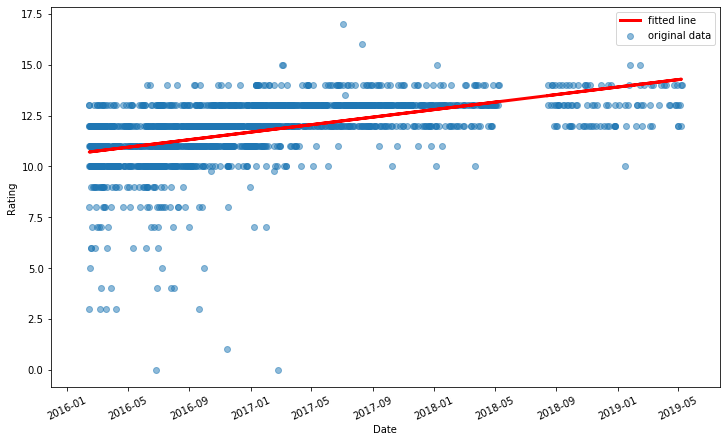

In [125]:
#Linear Fitting
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Timestamp.html
def convert_timestamp(x):
    return x.timestamp()

dog_rates['timestamp'] = dog_rates['created_at'].apply(convert_timestamp)
#print(dog_rates[dog_rates.timestamp<0])

#scipy.stats.linregress
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
linear_line = stats.linregress(dog_rates['timestamp'], dog_rates['rate'])
dog_rates['linear'] = (dog_rates['timestamp']* linear_line.slope) + linear_line.intercept
print(dog_rates.dtypes)
#show data
print(dog_rates)
print()
#slope and intercept
print("slope:"+ str(linear_line.slope))
print("intercept:"+ str(linear_line.intercept))
#Plot
plt.figure(figsize=(12,7))
plt.xticks(rotation=25)
plt.xlabel("Date")
plt.ylabel("Rating")
plt.scatter(dog_rates['created_at'], dog_rates.rate, label='original data', alpha=0.5)
plt.plot(dog_rates['created_at'], dog_rates['linear'], 'r-', label='fitted line', linewidth=3)
plt.legend()
plt.show()